In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#Dataset Download
fashion_mnist=keras.datasets.fashion_mnist  
#load dataset
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

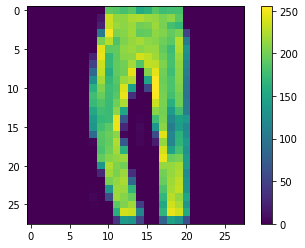

In [ ]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalizing the values
train_images=train_images/255
test_images=test_images/255

In [ ]:
#Choosing the class names (For more reference follow the dataset description)
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
#Creating the neural networks model using keras
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),  #input layer (flattened)
                        keras.layers.Dense(128,activation='relu'),  #1st hidden layer
                        keras.layers.Dense(100,activation='relu'),  #2nd hidden layer
                        keras.layers.Dense(10,activation='softmax') #output layer or final layer
])


#model Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 114,390
Trainable params: 114,390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training of the model
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4876 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3634 - accuracy: 0.8661
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3286 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.8922


In [ ]:
#testing of the model
test_loss,test_acc=model.evaluate(test_images,test_labels, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8789


In [ ]:
print("Test loss:",test_loss*100,"%","Test Accuracy:", test_acc*100,"%")

Test loss: 33.74001383781433 % Test Accuracy: 87.88999915122986 %
